# <center>Lecture 1. Pandas introduction. 

In [2]:
!pwd

/home/jovyan


In [3]:
!ls

__DATA	Lectue-1.ipynb	lost+found  __MANUAL  __SHARED


In [2]:
4+6

10

In [4]:
print('Hello world')

Hello world


In [4]:
5+6

11

In [5]:
!ls

Lecture1.ipynb	Lecture2.ipynb	Lecture3.ipynb	TypicalAnalyticalNotebooks


# Markdown
## heading 2

$ \sqrt{a^2+b^2}$

<img src = '../data/logo-gsom-en.jpg' >

Pandas is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like .csv, .tsv, or .xlsx. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with Matplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.
The main data structures in Pandas are implemented with Series and DataFrame classes. Dataframes is a real nice data structure to represent a big amounts of data. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of Series instances. DataFrames are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.
In this tutorial we have data about people and their properties

In [33]:
#import pandas library
import pandas as pd

In [13]:
?pd

In [34]:
#data - new variable from csv file 

data = pd.read_csv('/home/jovyan/__DATA/PMDM2022_Spring/data/beauty.csv', sep = ';')


In [15]:
#Show data type
type(data)

pandas.core.frame.DataFrame

In [16]:
#print first 5 values
#Our dataset has 10 rows with features and a lot of instances. 
#It looks like that this is a database from the social questionnaire.
# wage - salary in dollars
# exper - experience in years
# union - membership in professional union 
# goodhlt - do they estimate their health good or not
# black - skin color
# female - gender
# married - marital status 
# service - do they use any service 
# educ - education level
# looks - attractiveness in readers opinion
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## DataFrame shape

In [18]:
#return DataFrame shape 
data.shape

(1260, 10)

## Let's explore our DataFrame, try to find missing values, memory usages, data types, etc

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


### As we see all columns have 1260 not null values, 9 of them have type int64 and 1 - float64, memory usage is 98.5 kb

## Short statistics 
The Describe() method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [19]:
data.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


### Also, we can visualize some data from DataFrame, for example, we can plot histogram of wages. 

In [20]:
from matplotlib import pyplot as plt

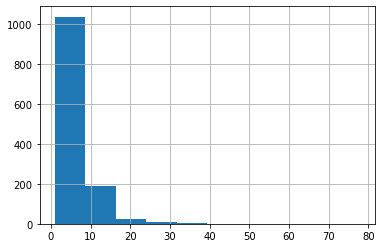

In [21]:
data['wage'].hist();

In [22]:
#return first 10 values by key exper
data['exper'].head(10)

0    30
1    28
2    35
3    38
4    27
5    20
6    12
7     5
8     5
9    12
Name: exper, dtype: int64

## Getting type by key

In [23]:
type(data['exper'])

pandas.core.series.Series

In [24]:
data.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

## This is indexed Pandas.Series object 


## loc vs iloc function

In [25]:
data.loc[0:5, ['wage','female']]

,wage,female
0,5.73,1
1,4.28,1
2,7.96,1
3,11.57,0
4,11.42,0
5,3.91,1


In [31]:
?data.loc

## Loc allows us to get features by rows and by feature-names using indexes and feature-keys. Iloc is indexing method like numpy arrays 


In [36]:
data['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [27]:
data.iloc[:,2:4]

,union,goodhlth
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1255,0,1
1256,0,1
1257,0,1
1258,0,1


## Sometimes we need to use iloc for geometrical indexation like numpy arrays with slicing methods.

## Let's look at boolean indexing.

In [45]:
data['female'].unique()

array([1, 0])

In [37]:
data['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

## We can subset our data with any boolean condition, this is a new DataFrame instance which could be saved in a new variable.

In [39]:
# head method returns the first 5 records.
data[data['female'] == 1]['wage'].head(10)

0      5.73
1      4.28
2      7.96
5      3.91
8      5.00
9      3.89
10     3.45
18    10.44
19     7.69
44     4.95
Name: wage, dtype: float64

## Also, we can get Series object from the DataFrame with boolean condition.

In [40]:
data[data['female'] == 1]['wage'].head(10)

0      5.73
1      4.28
2      7.96
5      3.91
8      5.00
9      3.89
10     3.45
18    10.44
19     7.69
44     4.95
Name: wage, dtype: float64

## Ex. Calculating the mean wage for women

In [41]:
data[data['female'] == 1]['wage'].mean()

4.299357798165136

## And the mean wage for men

In [42]:
data[data['female'] == 0]['wage'].mean()

7.3688228155339734

## Let's compare median wage for married and not married men

In [43]:
data[(data['female']==0) & (data['married']==1)]['wage'].median()

6.710000000000001

In [44]:
data[(data['female']==0) & (data['married']==0)]['wage'].median()

5.0649999999999995

## As we see married men have better financial conditions.

## It's better to calculate median, because average value is greatly influenced by outliers.¶

## Method groupby can be used for getting features for subgroups of data.
## Let's calculate median wage for all looks-rating unique values. 

In [46]:
#we loop through all the groups by feature 'looks'
# sub_df below is a DataFrame itself containing data for particular group
for i, sub_df in data.groupby('looks'):
    print(i, sub_df['wage'].median())

1 3.46
2 4.595000000000001
3 5.635
4 5.24
5 4.81


## Also it's possible to iterate through categorical features with function agg which aggregates data and call the function for all the data in the grouped subset.

In [47]:
#import numpy library
import numpy as np
#group data
data.groupby('looks')[['wage','exper']].agg(np.median)

,wage,exper
looks,,
1,3.460,32.0
2,4.595,18.0
3,5.635,18.0
4,5.240,12.5
5,4.810,8.0


## A good way to investigate features relationships is to build crosstabs.

In [48]:
pd.crosstab(data['female'],data['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


## Sometimes, when we are working with data, it is necessary to create a new feature from the existing features. 

## For example let's create a new feature: whether  the person is rich or poor based on 75% quantile for the feature 'wage'.

In [49]:
data['wage'].describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

## As we see about 75% of people earn less than 7.7 dollars per hour. We can create new feature 'is rich' which is based on this quantile.

In [50]:
data['is_rich'] = data['wage'] > data['wage'].quantile(.75)

## Let's look at the data, new feature has type boolean and based on boolean mask

In [51]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,False
1,4.28,28,0,1,0,1,1,0,12,3,False
2,7.96,35,0,1,0,1,0,0,10,4,True
3,11.57,38,0,1,0,0,1,1,16,3,True
4,11.42,27,0,1,0,0,1,0,16,3,True


## But we can convert Boolean data to int64 type.

In [52]:
data['is_rich'] = (data['wage'] > data['wage'].quantile(.75)).astype('int64')

In [53]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,0
1,4.28,28,0,1,0,1,1,0,12,3,0
2,7.96,35,0,1,0,1,0,0,10,4,1
3,11.57,38,0,1,0,0,1,1,16,3,1
4,11.42,27,0,1,0,0,1,0,16,3,1


## Apply + Lambda Functions

## Apply method can be used if we want to apply some functions to features (rows) in the dataset.

In [54]:
data.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
is_rich      0.250000
dtype: float64

## Creating new feature based on complex function.

In [55]:
# define new function.
def string_gender(female):
    return 'female' if female else 'male'

In [56]:
#apply defined function to Series and return head of Series
data['female'].apply(string_gender).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

## Also we can define Lambda function as an argument for apply method.
lambda is an anonymous function which we can define right in the place where it's used

In [57]:
data['female'].apply(lambda female: 'female' if female else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

## Mapping features by a numpy dictionary. 

In [58]:
#New dictionary for value 1 - union member, 0 - no union member
dic = {1: 'union', 0:'no_union'}

In [59]:
#return union Series with mapped data.
data['union'].map(dic).head()

0    no_union
1    no_union
2    no_union
3    no_union
4    no_union
Name: union, dtype: object

In [ ]:
data